# ECE457A Assignment 2

**By: Logan Hartford**

**Due: 10/11/2024**

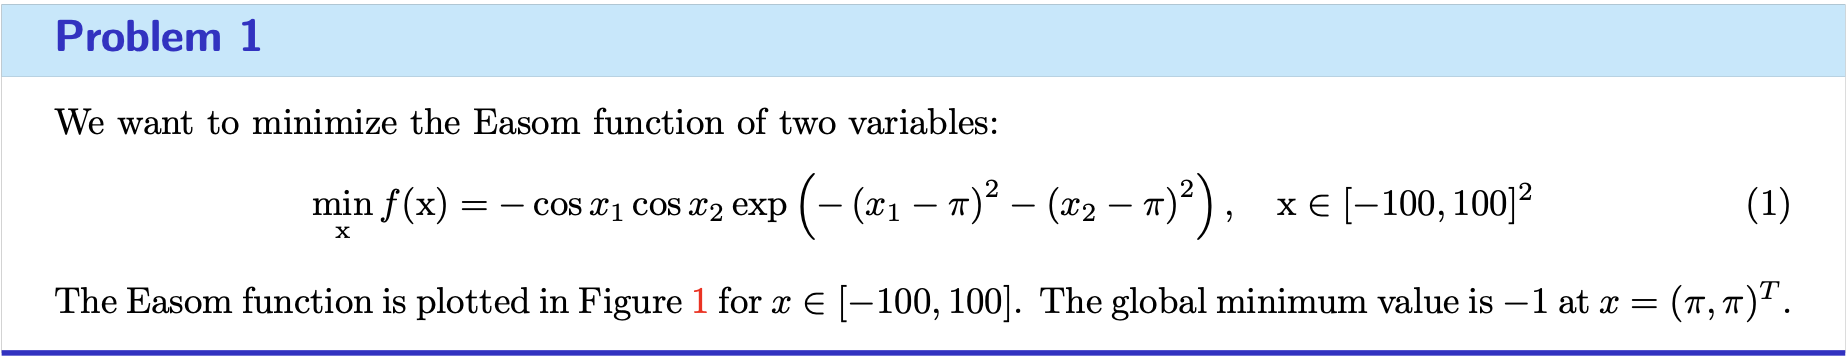

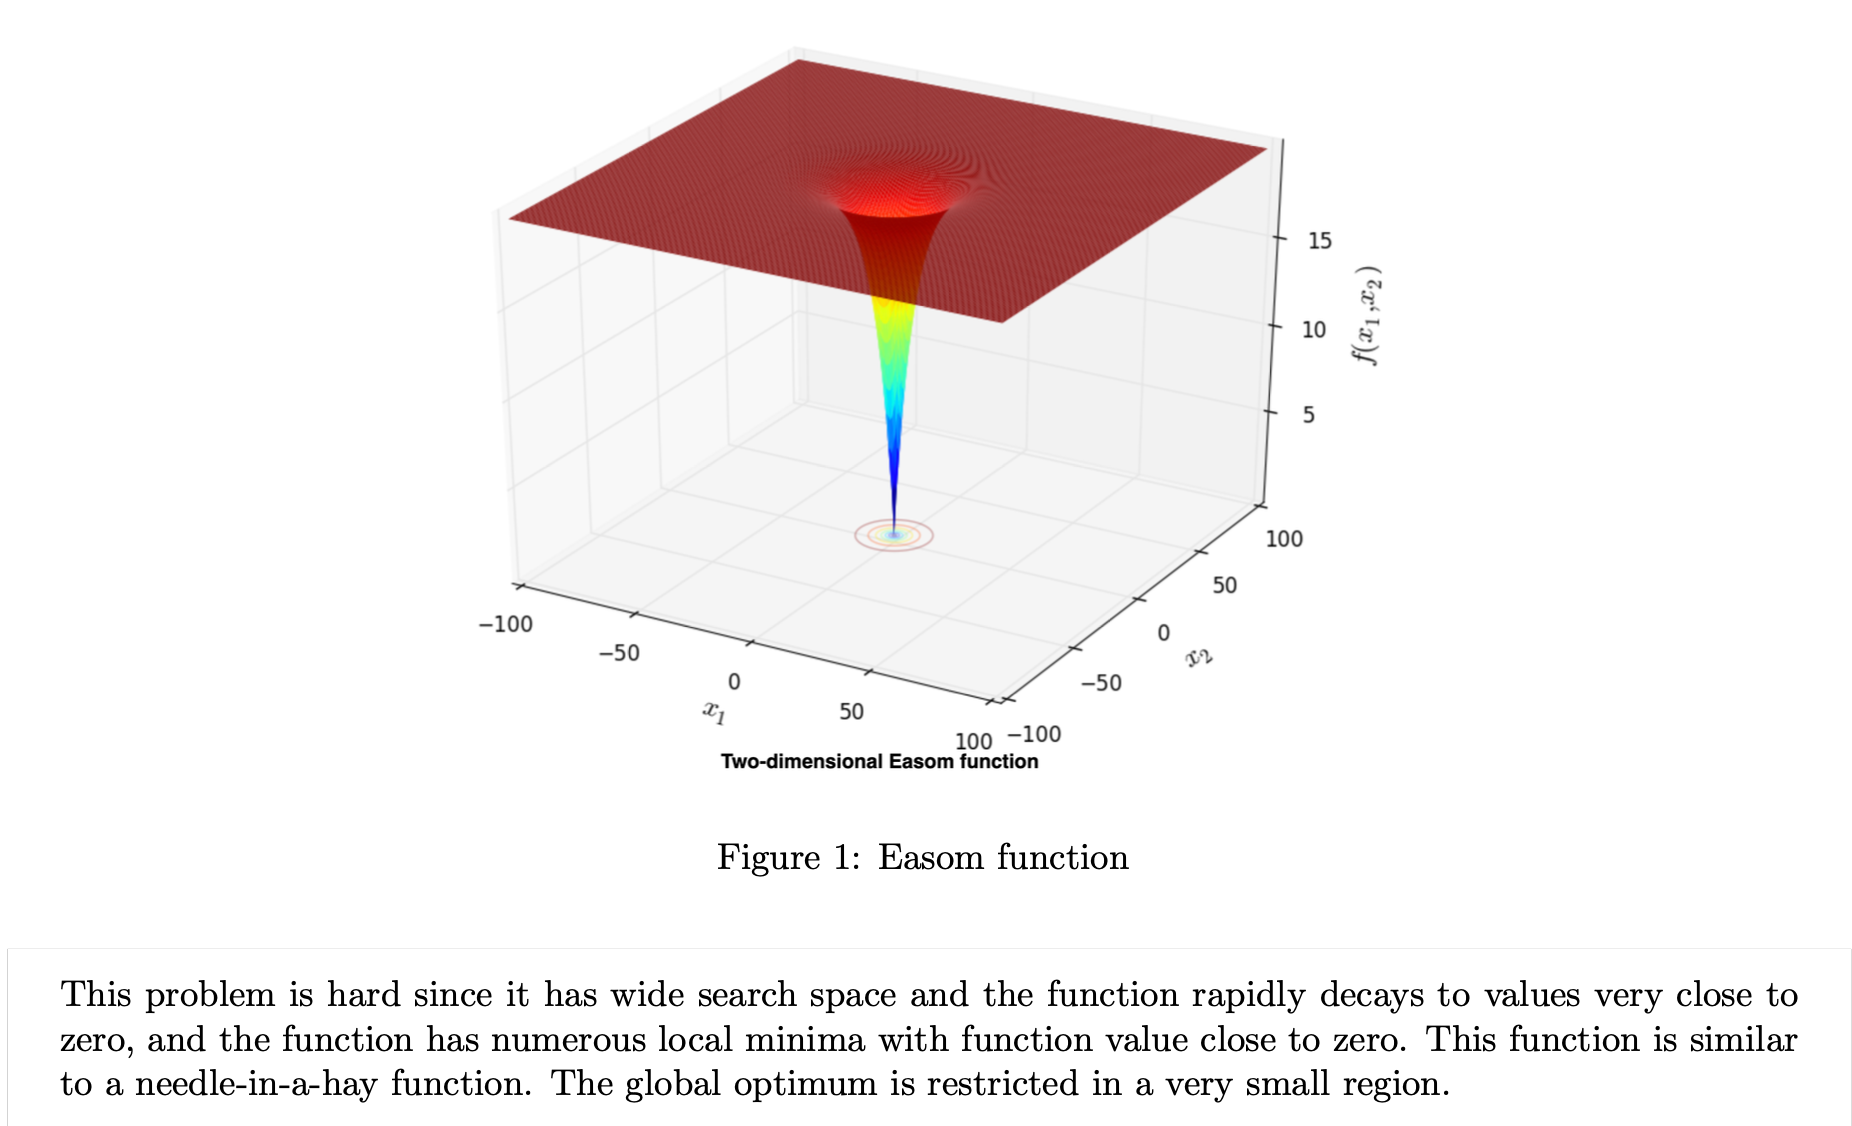

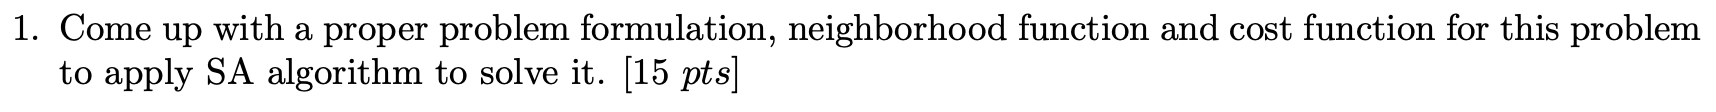

### 1.1 Problem Formulation

#### 1.1.1 Objective
- Minimize the Easom function.

#### 1.1.2 Search Space
- The search space consists of all possible pairs of input values within the given range. 
- This means any combination of two values between -100 and 100 is a potential solution.

#### 1.1.3 Initial Solution
- Start with a randomly chosen pair of input values within the search space.

#### 1.1.4 Neighboorhood Definition
- A neighboring solution is found by slightly altering the current pair of input values.
- This adjustment is done by adding a small random change to each input. 
- The amount of change should decrease gradually as the solution progresses.

#### 1.1.5 Acceptance Criteria
- Compare neighbooring solution with current solution.
- If the new solution is better, accept it.
- If it is worse, accpet it based on a probability that decreases as the algorithm proceeds.

#### 1.1.6 Cooling Schedule
- Gradually reduce the temperature parameter over time. 
- The temperature starts high, allowing more frequent acceptance of worse solutions to escape local minima.
- Then decreases progressivly to make the algorithm more selective as it converges to a minimum.

#### 1.1.7 Stopping Criteria
- The temperature becomes very low, or
- A maximum number of iterations is reached, or 
- There is no noticeable improvement in the function value over a set number of iterations.

#### 1.1.8 Evaluation and Output
- Track the best solution found throughout the optimization process.
- Evaluate the performance of the algorithm with different parameter settings.

### 1.2 Neighborhood Function
- Generates new candidates by making small random changes to the current inputs.
- The small random changes are often taken from Guassian distribution with mean 0 or a uniform distribution.

### 1.3 Cost Function
- The cost function evaluates the quality of a state.
- In this case, the only measure of quality it the value of the function at a state.
- The cost function is therefore, the function itself.

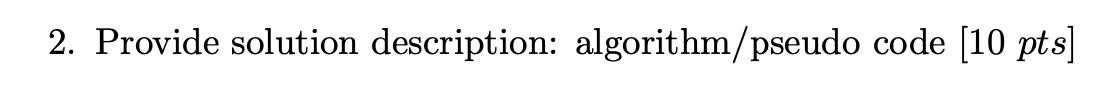

### 1.2 Pseudo Code

#### Algorithm: Simulated Annealing for Minimizing Easom Function

**Input:**  
Initial solution `(x1, x2)`, initial temperature `T`, cooling rate `alpha`,  
minimum temperature `Tmin`, maximum iterations `max_iter`

**Output:**  
Best solution found `(x1_best, x2_best)` and its function value `f_best`

1. Initialize `(x1_current, x2_current)` with a random point in `[-100, 100]^2`
2. Set `x1_best`, `x2_best` to `x1_current`, `x2_current`
3. Compute `f_current = Easom(x1_current, x2_current)`
4. Set `f_best = f_current`
5. While `T > Tmin`:
    
    a. For `i = 1` to `max_iter`:
        
    i.   Generate new potential solution `(x1_new, x2_new)` by adding a small random change  
            to `(x1_current, x2_current)`  
            - `x1_new = x1_current + random change`  
            - `x2_new = x2_current + random change`

    ii.  Compute `f_new = Easom(x1_new, x2_new)`

    iii. If `f_new < f_current`:
            - Accept the new solution  
            - Set `(x1_current, x2_current) = (x1_new, x2_new)`  
            - Set `f_current = f_new`  
            Else:
            - Accept the new solution with probability `P = exp(-(f_new - f_current) / T)`  
                (generate a random number between 0 and 1; if it is less than `P`, accept the solution)

    iv.  If `f_current < f_best`:
            - Update the best solution: `(x1_best, x2_best) = (x1_current, x2_current)`  
            - Set `f_best = f_current`

    b. Reduce the temperature: `T = alpha * T`

6. Return `(x1_best, x2_best)` and `f_best`


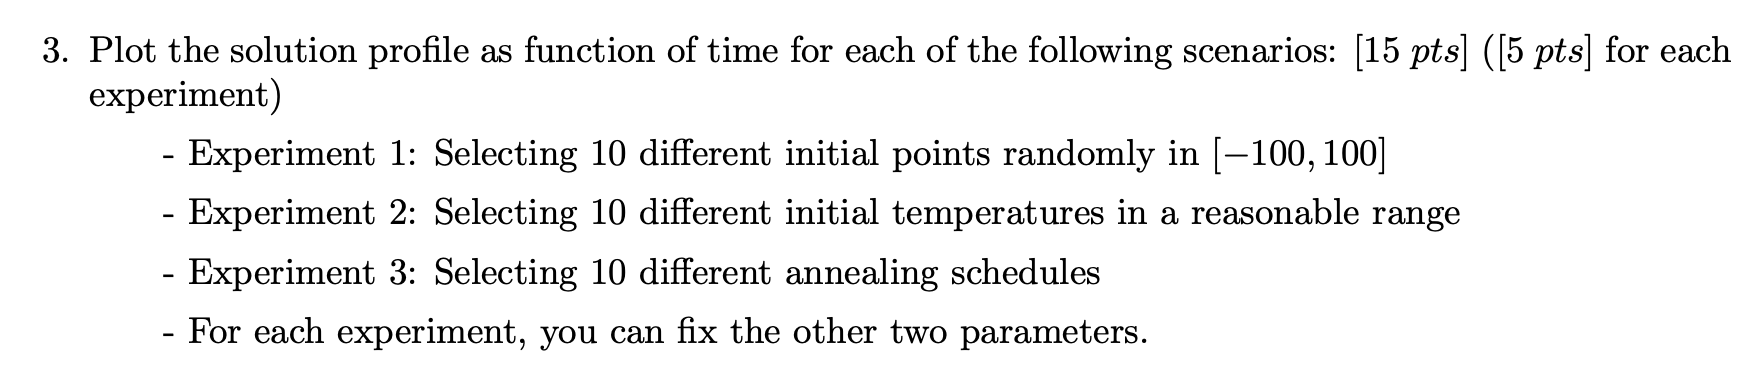

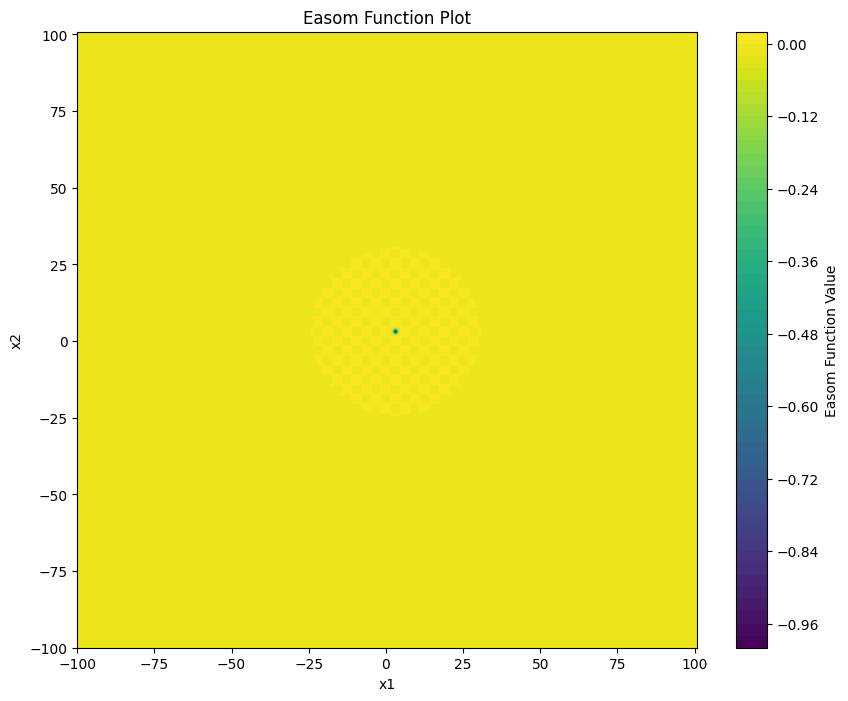

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def easom(x1, x2):
    return -np.cos(x1) * np.cos(x2) * np.exp(-(x1 - np.pi)**2 - (x2 - np.pi)**2)

# Chat gpt made this function
def plot_easom_function():
    x1_vals = np.arange(-100, 101, 0.1)
    x2_vals = np.arange(-100, 101, 0.1)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

    z_vals = easom(x1_grid, x2_grid)

    plt.figure(figsize=(10, 8))
    plt.contourf(x1_grid, x2_grid, z_vals, levels=50, cmap='viridis')
    plt.colorbar(label='Easom Function Value')
    plt.title('Easom Function Plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot_easom_function()


In [2]:
print(easom(np.pi, np.pi))
print(easom(3, 3))
print(easom(2, 2))

-1.0
-0.9415641575364946
-0.012779642669914994


In [3]:
def simulated_annealing(initial_solution, initial_temp, cooling_rate, max_iter, min_temp, step_size=5):
    x1_current, x2_current = initial_solution
    f_current = easom(x1_current, x2_current)
    x1_best, x2_best, f_best = x1_current, x2_current, f_current
    T = initial_temp

    f_history = [f_best]

    for i in range(max_iter):
        # Generate neighbour
        x1_new = x1_current + np.random.uniform(-step_size, step_size)
        x2_new = x2_current + np.random.uniform(-step_size, step_size)
        print(x1_new, x2_new)
        f_new = easom(x1_new, x2_new)

        diff = f_new - f_current
        metropolis = np.exp(-(diff) / T)
        prob = np.random.rand()
        # print(f"diff: {diff}, metropolis: {metropolis}, prob: {prob}")
        if diff < 0 or prob < metropolis:
            x1_current, x2_current, f_current = x1_new, x2_new, f_new

        # Update best solution
        if f_current < f_best:
            x1_best, x2_best, f_best = x1_current, x2_current, f_current

        f_history.append(f_best)

        # Cool down
        T *= cooling_rate

        if i % 100 == 0:
            print(f"Iteration {i}, Best solution: {f_best}")

    return (x1_best, x2_best), f_best, f_history


In [4]:
best, f_best, f_history = simulated_annealing((50, 50), 100, 0.99, 10000, 0.1, step_size=1)

49.36544391617864 49.28959183455124
Iteration 0, Best solution: -0.0
48.38829866337665 49.42373915813689
48.19160649096131 49.748074905953295
49.0022084496058 48.77754273110281
48.78744760482571 48.23692542707048
49.18570817551326 48.14596052451805
49.724593149076995 47.74530118180188
50.47816101246192 48.307595767813744
50.602557334001766 49.206018142071514
49.606298240179214 49.25567165804094
49.92032782017418 49.2322386456174
50.116167092146995 49.9642261467557
50.854448310976515 49.9174619991325
51.519153337074954 50.58578637762102
52.49800652069678 49.72524168247764
53.374611967577586 49.97240251691883
53.90553063995635 49.11375091394308
54.56702760856288 48.26821682333965
55.02005849741836 48.5157921558262
55.02116053623098 47.78728363418833
55.39466971478202 47.46545110502182
56.06299587650077 46.62478664076385
55.95675006803937 45.83949107367813
55.439595654160875 45.84734960654214
54.93979724310946 46.37575230014473
54.033174963705385 47.23053454088448
54.9499492162642 48.0540

[ 83.1699407  -94.67997804]
-24.938039958661278 -18.555648023324217
Iteration 0, Best solution: -0.0
-28.84076135787149 -22.435700122939117
-30.533617996518323 -18.82818730480202
-29.071245793278415 -22.714067912822046
-29.168823256635452 -17.852288686339826
-29.574975149873644 -21.55939584443606
-33.93319028894011 -22.262257897014965
-32.06455239131745 -26.31209146732976
-29.282940643088715 -22.55335134230027
-28.1446064238158 -24.588581363505845
-24.172321237645424 -23.03226907278247
-27.607774358610992 -18.581006132058207
-23.57368172235396 -15.040303098562376
-27.307389130403728 -17.43848013142589
-24.066573864651076 -12.965524586347229
-20.95803020786507 -8.887540139326452
-17.490073256915565 -8.937044563251778
-12.623202768087 -6.950244135537712
-15.092192458869581 -7.908545309585562
-10.162141347955444 -8.554301904895777
-11.682799236611682 -7.17377480829734
-14.45659299516199 -3.8740196371265405
-11.67621087247513 -4.00136449287199
-14.204704611237483 -3.38848327615003
-11.5940

/var/folders/2k/4qr02sn90yvdch9k5gzldk5h0000gn/T/ipykernel_60290/415178820.py:17: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-(diff) / T)


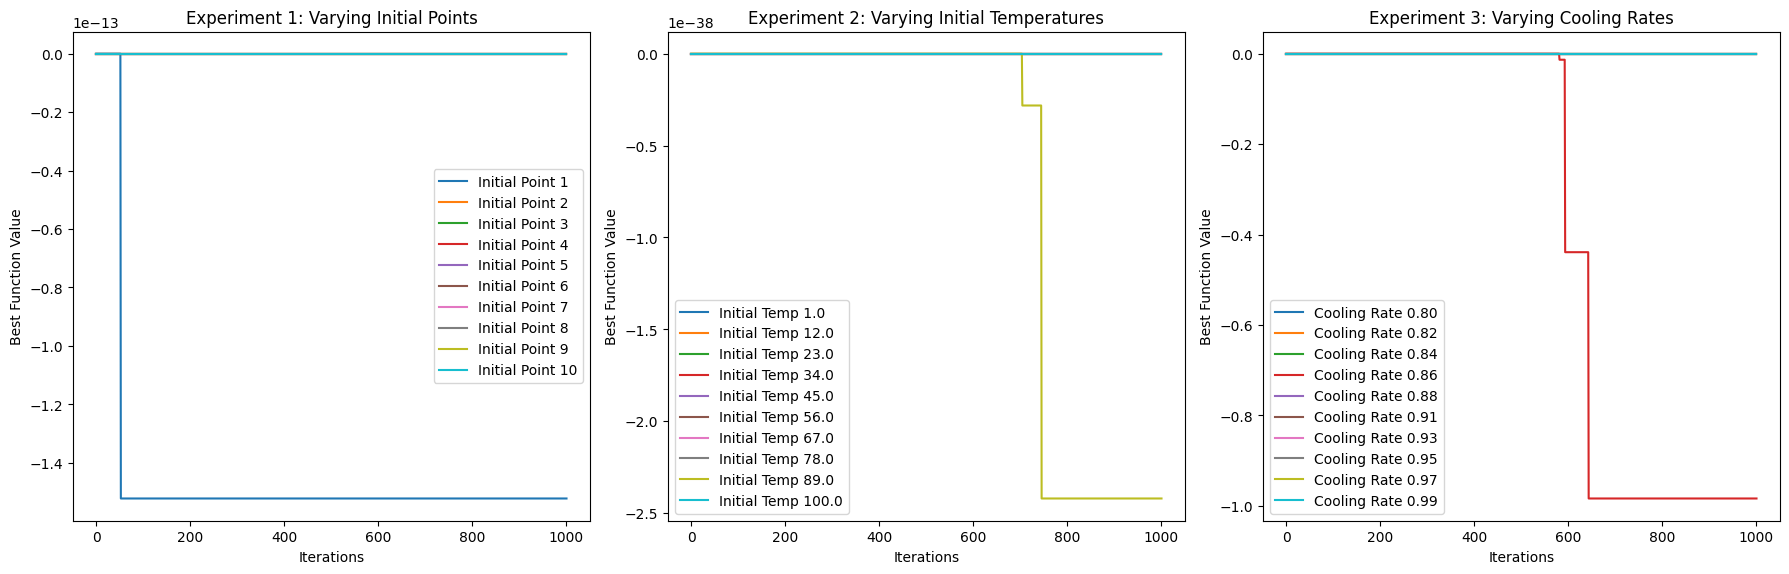

In [5]:
# Parameters for experiments
initial_points = [np.random.uniform(-100, 100, 2) for _ in range(10)]
initial_temperatures = np.linspace(1, 100, 10)
cooling_rates = np.linspace(0.8, 0.99, 10)
min_temp = 1e-14
max_iter = 1000
best_temp = 1
best_cr = 0.95
rand_start = np.random.uniform(-100, 100, 2)
print(rand_start)


# Experiment 1: Varying initial points
experiment1_results = []
for point in initial_points:
    _, _, f_history = simulated_annealing(point, best_temp, best_cr, max_iter, min_temp)
    experiment1_results.append(f_history)

# Experiment 2: Varying initial temperatures
experiment2_results = []
for temp in initial_temperatures:
    _, _, f_history = simulated_annealing(rand_start, temp, best_cr, max_iter, min_temp)
    experiment2_results.append(f_history)

# Experiment 3: Varying cooling rates
experiment3_results = []
for rate in cooling_rates:
    _, _, f_history = simulated_annealing(rand_start, best_temp, rate, max_iter, min_temp)
    experiment3_results.append(f_history)

# Plotting results for each experiment
plt.figure(figsize=(18, 6))

# Plot for Experiment 1
plt.subplot(1, 3, 1)
for i, f_history in enumerate(experiment1_results):
    plt.plot(f_history, label=f'Initial Point {i+1}')
plt.title('Experiment 1: Varying Initial Points')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 2
plt.subplot(1, 3, 2)
for i, f_history in enumerate(experiment2_results):
    plt.plot(f_history, label=f'Initial Temp {initial_temperatures[i]:.1f}')
plt.title('Experiment 2: Varying Initial Temperatures')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 3
plt.subplot(1, 3, 3)
for i, f_history in enumerate(experiment3_results):
    plt.plot(f_history, label=f'Cooling Rate {cooling_rates[i]:.2f}')
plt.title('Experiment 3: Varying Cooling Rates')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

plt.tight_layout()
plt.show()

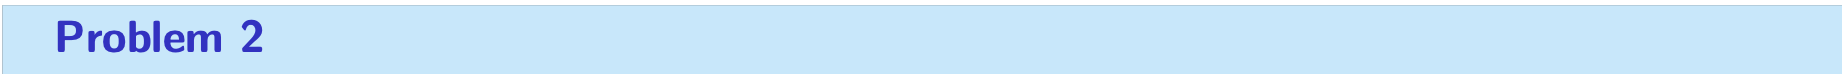

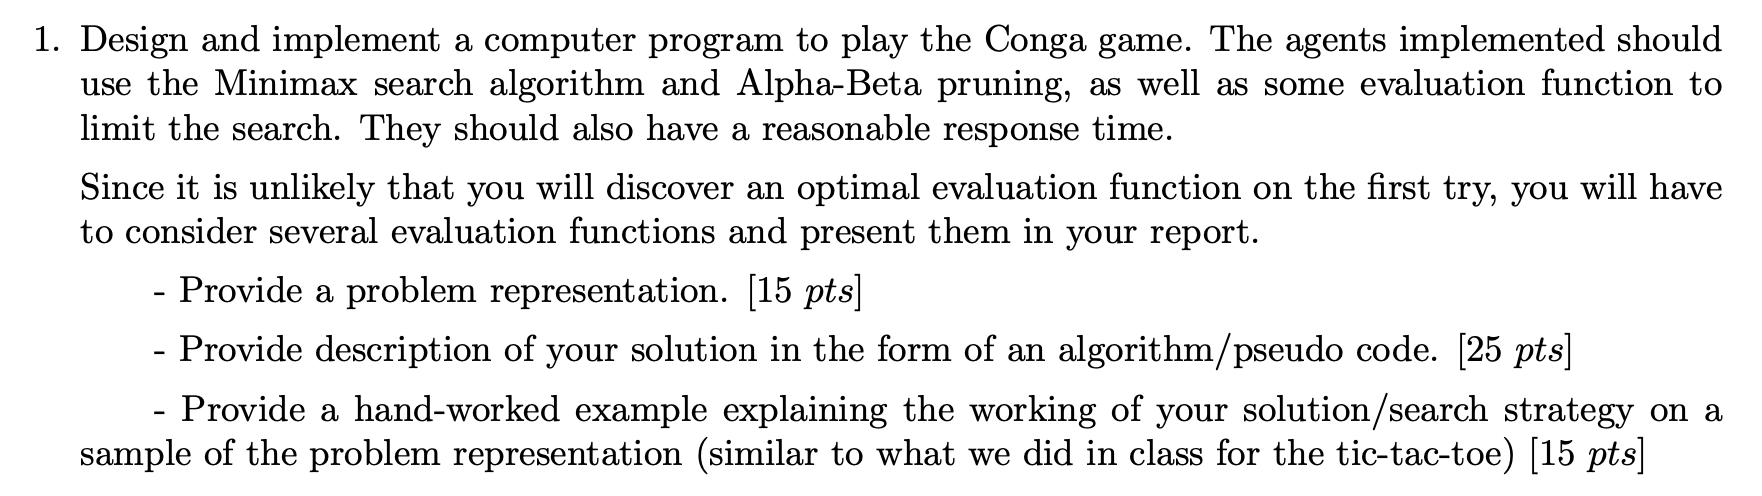

### 2.1 Problem Representation

#### 2.1.1 Objective
- Develop an agent that can play the Conga game rationally, aiming to block the opponent's stones so they have no legal moves.

#### 2.1.2 Search Space
- The search space consists of all possible valid game states.
- Each state is defined by the positions of the stones for both players on a 4x4 board.

#### 2.1.3 Initial Solution
- Player 1 has ten black stones in (1,4), and Player 2 has ten white stones in (4,1).

#### 2.1.4 Neighborhood Definition
- The neighboring states are defined by all possible valid moves for the current player.
- A valid move involves moving stones from one square to one or more adjacent squares, according to the game rules.

#### 2.1.5 Move Evaluation
- Use a Minimax algorithm with Alpha-Beta pruning to evaluate the potential outcomes of moves.
- The evaluation function estimates the quality of a game state for the current player.
- Possible evaluation criteria could include the number of stones in advantageous positions or the number of blocked opponent stones.

#### 2.1.6 Search Strategy
- Use a depth-limited Minimax search with Alpha-Beta pruning to explore possible game states.
- At each turn, select the move that maximizes the minimum score obtainable by the opponent.

#### 2.1.7 Stopping Criteria
- The game ends when one player has no legal moves left.

#### 2.1.8 Evaluation and Output
- Output the chosen move, the evaluation score of the move, and the number of nodes explored during the search.
- Measure the agent's performance by playing multiple games against a Random Agent.

### 2.1 Pseudo Code

#### Function Definitions
1. **Minimax(state, depth, alpha, beta, maximizingPlayer):**
    - **Input:**
        - `state`: Current board configuration.
        - `depth`: Current search depth.
        - `alpha`: The best score that the maximizing player can guarantee so far.
        - `beta`: The best score that the minimizing player can guarantee so far.
        - `maximizingPlayer`: Boolean indicating if the current player is the maximizing player.
    - **Output:**
        - The evaluation score for the current state.

    - **Base Case:**
        - If `depth` is 0 or the game is over (no legal moves for either player), return the evaluation of `state`.

    - **If maximizingPlayer is true:**
        - Set `maxEval = -∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, false)`
            - `maxEval = max(maxEval, eval)`
            - `alpha = max(alpha, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `maxEval`

    - **Else (minimizingPlayer is true):**
        - Set `minEval = ∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, true)`
            - `minEval = min(minEval, eval)`
            - `beta = min(beta, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `minEval`

2. **EvaluationFunction(state):**
    - Calculate a score for the given `state`.
    - Some things to try:
        - The number of legal moves available for the opponent.
        - The number of postions controlled by the agent minus the positions controlled by the opponent.
        - Difference is largest concentration of stones between the two players.
        - The total number of squares available for captures across valid moves.
        - Number of stones with valid moves.
    - Return the calculated score.

3. **GenerateLegalMoves(state, player):**
    - Given the current `state` and the `player`, generate a list of all valid moves according to the game rules.
    - Return the list of moves.

#### Main Algorithm

1. **Initialize:**
    - `currentState = initial board configuration`
    - `player = maximizingPlayer (e.g., Player 1)`

2. **Game Loop:**
    - While the game is not over (current player has valid moves):
        - If `player` is the maximizing player:
            - Set `bestMove = None`
            - Set `bestValue = -∞`
            - For each move in `GenerateLegalMoves(currentState, player)`:
                - Apply the move to generate `newState`.
                - `moveValue = Minimax(newState, searchDepth, -∞, ∞, false)`
                - If `moveValue > bestValue`:
                    - `bestValue = moveValue`
                    - `bestMove = move`
            - Update `currentState` with `bestMove`.
        - Else (minimizing player):
            - Follow the same procedure, but minimize the `moveValue`.

        - Switch `player` to the other player.
    
3. **End of Game:**
    - Output the result of the game (winner, final board configuration, number of turns taken).


### 2.1 Hand Worked Example

#### Initial Conditions
- Player1 is Maximizing player.
- Player1 starts.
- Depth = 2
- Start of game.

#### Evaluation Function
- Number of valid moves for Player1, minus number of valid moves for Player2

#### MinMax Tree
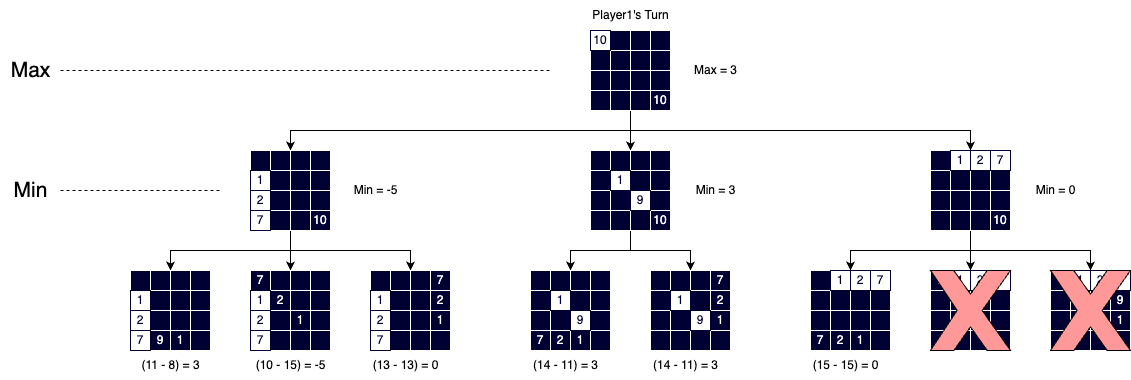

- In this case Player1's first move would be to move diagonally.
- The two right most nodes are never explored becasue they are pruned.
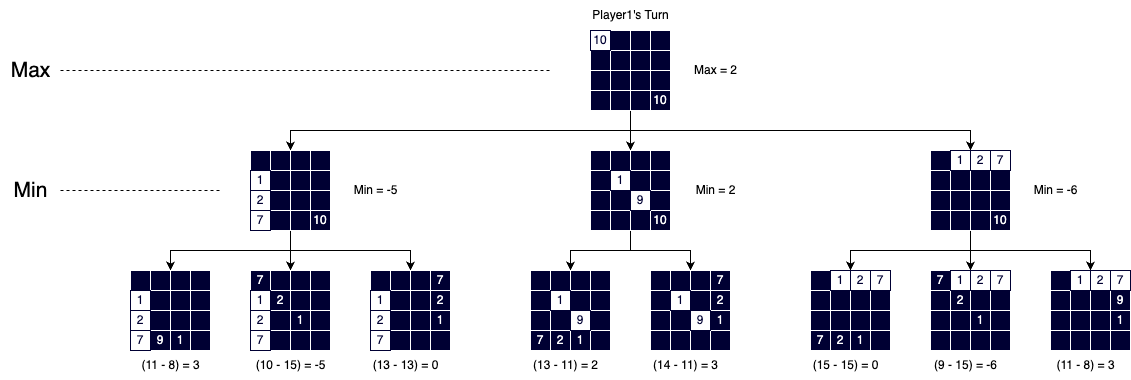

### 2.1 Building out The Game

In [6]:
# Creating the game board
def create_board():
    return np.array([
        [10, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, -10],
        ])

board = create_board()
print(board)

[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]


In [7]:
def location_valid(board, row, col, player):
    return (0 <= row < 4 and 0 <= col < 4) and (board[row, col] * player >= 0)

def generate_moves(board, player):
    moves = []
    directions = [
        (-1, 0),  # up
        (1, 0),   # down
        (0, -1),  # left
        (0, 1),   # right
        (-1, -1), # up-left
        (-1, 1),  # up-right
        (1, -1),  # down-left
        (1, 1)    # down-right
    ]

    # Iterate through the board to find the player's stones
    for row in range(4):
        for col in range(4):
            # If stone belongs to player
            if board[row, col] * player > 0:
                for direction in directions:
                    new_row, new_col = row + direction[0], col + direction[1]

                    # Check if the move is within the board boundaries
                    if location_valid(board, new_row, new_col, player):
                            moves.append(((row, col), direction))
    
    return moves

In [8]:
# Testing generate_moves function
board = np.array([
        [10, 0, 0, 0],
        [0, -9, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0],
        ])
player = 1  # Player 1's turn
moves = generate_moves(board, player)
print("Possible moves for Player 1:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

player = -1  # Player 2's turn
moves = generate_moves(board, player)
print("\nPossible moves for Player 2:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

Possible moves for Player 1:
Start: (0, 0), Direction: (1, 0)
Start: (0, 0), Direction: (0, 1)

Possible moves for Player 2:
Start: (1, 1), Direction: (-1, 0)
Start: (1, 1), Direction: (1, 0)
Start: (1, 1), Direction: (0, -1)
Start: (1, 1), Direction: (0, 1)
Start: (1, 1), Direction: (-1, 1)
Start: (1, 1), Direction: (1, -1)
Start: (1, 1), Direction: (1, 1)
Start: (2, 2), Direction: (-1, 0)
Start: (2, 2), Direction: (1, 0)
Start: (2, 2), Direction: (0, -1)
Start: (2, 2), Direction: (0, 1)
Start: (2, 2), Direction: (-1, -1)
Start: (2, 2), Direction: (-1, 1)
Start: (2, 2), Direction: (1, -1)
Start: (2, 2), Direction: (1, 1)


In [9]:
def apply_move(board, move, player):
    new_board = np.copy(board)
    (start_row, start_col), direction = move
    num_stones = abs(new_board[start_row, start_col])

    # Clear the starting position
    new_board[start_row, start_col] = 0

    # Distribute the stones along the specified direction
    current_row, current_col = start_row, start_col
    for step in range(1, num_stones + 1):
        if not num_stones:
            break
        current_row += direction[0]
        current_col += direction[1]

        if location_valid(new_board, current_row, current_col, player):
            place = min(num_stones, step)
            new_board[current_row, current_col] += place * player
            num_stones -= place
        else:
            current_row -= direction[0]
            current_col -= direction[1]
            new_board[current_row, current_col] += num_stones * player
            break

    return new_board

In [10]:
# Testing apply_move function
board = create_board()

move = ((0, 0), (0, 1))  # Move to the right
player = 1  # Player 1's turn
new_board = apply_move(board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((3, 3), (-1, 0)) # Move up
player = -1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((0, 2), (1, 0)) # Move down
player = 1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

New board state after applying the move:
[[  0   1   2   7]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]
New board state after applying the move:
[[ 0  1  2  7]
 [ 0  0  0 -9]
 [ 0  0  0 -1]
 [ 0  0  0  0]]
New board state after applying the move:
[[ 0  1  0  7]
 [ 0  0  1 -9]
 [ 0  0  1 -1]
 [ 0  0  0  0]]


In [11]:
def minimax(board, depth, alpha, beta, maximizingPlayer, eval_function):
    # Base case: if the maximum depth is reached or the game is over
    if depth == 0 or len(generate_moves(board, 1)) == 0 or len(generate_moves(board, -1)) == 0:
        return eval_function(board)

    if maximizingPlayer:
        maxEval = float('-inf')
        for move in generate_moves(board, 1):
            new_board = apply_move(board, move, 1)
            
            # Recursively call minimax
            eval = minimax(new_board, depth - 1, alpha, beta, False, eval_function)
            
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            
            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return maxEval
    else:
        minEval = float('inf')
        for move in generate_moves(board, -1):
            new_board = apply_move(board, move, -1)
            
            # Recursively call minimax
            eval = minimax(new_board, depth - 1, alpha, beta, True, eval_function)

            minEval = min(minEval, eval)
            beta = min(beta, eval)

            # Alpha-Beta pruning
            if beta <= alpha:
                break
        return minEval

In [12]:
# Evaluation Funcitons
def eval_move_delta(board):
    player1_moves = len(generate_moves(board, player=1))
    player2_moves = len(generate_moves(board, player=-1))
    
    return player1_moves - player2_moves

def eval_opponent_moves(board, player):
    opponent = -player
    opponent_moves = len(generate_moves(board, opponent))
    return -opponent_moves

def eval_position_control(board, player):
    player_positions = np.sum(board * player > 0)
    opponent_positions = np.sum(board * -player > 0)
    return player_positions - opponent_positions

def eval_concentration(board, player):
    player_max_concentration = np.max(board * (board * player > 0))
    opponent_max_concentration = np.max(board * (board * -player > 0))
    return player_max_concentration - opponent_max_concentration

def eval_available_captures(board, player):
    moves = generate_moves(board, player)
    capture_opportunities = sum(1 for move in moves if board[move[0][0], move[0][1]] * player > 0)
    return capture_opportunities

def eval_stones_with_moves(board, player):
    moves = generate_moves(board, player)
    stones_with_moves = len({(move[0][0], move[0][1]) for move in moves})
    return stones_with_moves

In [13]:
# Testing minimax function
board = create_board()
depth = 2
alpha = float('-inf')
beta = float('inf')
maximizingPlayer = True

# Pass the custom evaluation function to minimax
score = minimax(board, depth, alpha, beta, maximizingPlayer, eval_move_delta)
print("Minimax evaluation score:", score)

Minimax evaluation score: 3


In [14]:
def play_game(board, depth, eval_function, player1_agent, player2_agent, verbose=False, limit_epochs=True):
    current_player = 1  # Player 1 starts
    game_over = False
    turns = 0

    while not game_over:
        turns += 1
        if (limit_epochs) and (turns % 100 == 0):
            break

        if verbose:
            print("Current board state:")
            print(board)

        if current_player == 1:
            # Player 1's turn
            if verbose: print("Player 1's turn")
            moves = generate_moves(board, current_player)
            if not moves:
                print("Player 1 has no legal moves. Player 2 wins!")
                break

            # Use the specified strategy for Player 1
            board = player1_agent(board, current_player, depth, eval_function)
        else:
            # Player 2's turn
            if verbose: print("Player 2's turn")
            moves = generate_moves(board, current_player)
            if not moves:
                print("Player 2 has no legal moves. Player 1 wins!")
                break

            # Use the specified strategy for Player 2
            board = player2_agent(board, current_player, depth, eval_function)

        # Check if the game is over (no moves left for either player)
        if not generate_moves(board, 1) and not generate_moves(board, -1):
            print("No legal moves left for either player. The game is a draw.")
            break
        
        # Switch players
        current_player = -current_player

    return board, turns

In [19]:
import random

# Agents
def minimax_agent(board, player, depth, eval_function):
    moves = generate_moves(board, player)
    best_move = None
    best_value = float('-inf') if player == 1 else float('inf')
    alpha = float('-inf')
    beta = float('inf')
    
    for move in moves:
        new_board = apply_move(board, move, player)
        move_value = minimax(new_board, depth, alpha, beta, player == -1, eval_function)
        
        if (player == 1 and move_value > best_value) or (player == -1 and move_value < best_value):
            best_value = move_value
            best_move = move

    return apply_move(board, best_move, player)

def first_move_agent(board, player, depth, eval_function):
    moves = generate_moves(board, player)
    return apply_move(board, moves[0], player)

def do_nothing_agent(board, player, depth, eval_function):
    return board

def random_agent(board, player, *args):
    moves = generate_moves(board, player)
    random_move = random.choice(moves)
    return apply_move(board, random_move, player)

In [20]:
# Testing play_game function
game_depth = 3 
initial_board = create_board()
final_board, turns = play_game(initial_board, game_depth, eval_move_delta, minimax_agent, do_nothing_agent, verbose=False)
print("Final board state:")
print(final_board)
print(f"Turns: {turns}")
    

Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12


In [21]:
# Testing Evaluation Functions
evaluation_functions = [eval_move_delta, eval_opponent_moves, eval_position_control, eval_concentration, eval_available_captures, eval_stones_with_moves]
agents = [first_move_agent, do_nothing_agent, random_agent]

for eval_function in evaluation_functions:
    print(f"\nEvaluation Function: {eval_function.__name__}")
    for agent in agents:
        print(f"Agent: {agent.__name__}")
        final_board, turns = play_game(initial_board, game_depth, eval_function, minimax_agent, agent, verbose=False)
        print(f"Final board state:")
        print(final_board)
        print(f"Turns: {turns}")


Evaluation Function: eval_move_delta
Agent: first_move_agent
Final board state:
[[ 1  0  1 -9]
 [ 0  1  1  1]
 [ 1  1  1  0]
 [ 0  1  1 -1]]
Turns: 100
Agent: do_nothing_agent
Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12
Agent: random_agent
Final board state:
[[ 0  0  1 -7]
 [ 1  1  2  1]
 [ 1  1  1 -3]
 [ 0  0  1  0]]
Turns: 100

Evaluation Function: eval_opponent_moves
Agent: first_move_agent


TypeError: eval_opponent_moves() missing 1 required positional argument: 'player'

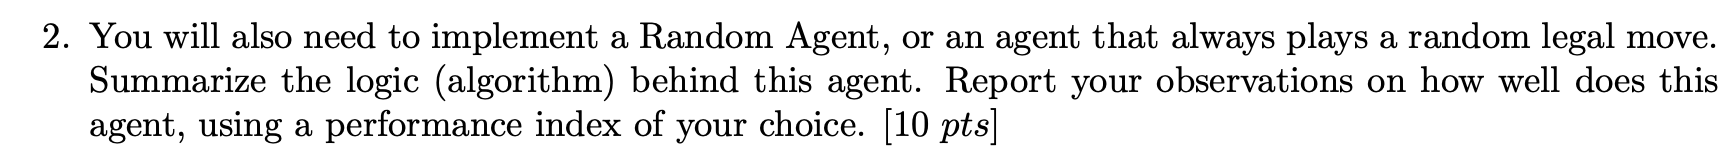

In [18]:
random_agent

<function Q2.random_agent(board, player, *args)>

### 2.2 Random Agent

#### 2.2.1 Logic
- The agent works by selecting a random move from the list of generated moves

### 2.2.2 Perfomance